Abdur Rehman

**Research question/interests**

**"Are children one of the underlying factors contributing to the high costs of healthcare in the United States"**

To help me answer this question, I will add a 'FamilySize' (Parent +Children) column in the dataset. The addition of this new column will help answer the question about the underlying factors contributing to high healthcare costs in the United States because of family size. By including data on family rates in the healthcare cost data set, you can explore the relationship between family size and healthcare costs, and investigate whether regions with larger family sizes also have higher healthcare costs. This information can help healthcare providers and policymakers to consider family size when designing healthcare policies and determining healthcare costs to ensure that families are not unfairly burdened by their size.

**"Is a person's age one of the fundamental causes leading to America's high healthcare costs?"**

People are more likely to develop chronic health disorders that necessitate continuing medical care and treatment as they age. Diabetes, heart disease, and cancer are all reletively known to have high treatment costs that rise with age. Understanding the impact of age on healthcare costs is critical for policymakers and clinicians to develop effective ways for managing healthcare costs and improving patient outcomes. Researchers and healthcare professionals can collaborate to develop more effective strategies to lower healthcare costs while improving patient outcomes by recognising the association between age and healthcare expenses.

To help me investigate whether age affects medical costs, I will create several graphs using data that includes age and charges.

**"Does a families average medical cost vary on where they located in the United States?** 



A family's average medical expenditure varies by location in the United States is an important topic in my opinion, since it can provide insights on regional healthcare inequities. By identifying these discrepancies, policymakers can take efforts to alleviate them, such as expanding access to healthcare in underprivileged areas or enacting laws to reduce healthcare expenses in high-cost regions. Furthermore, this information might help families decide where to live by providing insights into the prospective healthcare expenditures they may encounter in different parts of the country. In general, determining if a family's average medical expense varies by geography might aid in identifying areas for improvement in the healthcare system. 

To help me determine whether average medical charges for families vary depending on where they live. I will create graphs and commit deep analyasis in order to come to a conlcusion. 

In [1]:
import pandas as pd

project_data = pd.read_csv('../data/raw/Medical_Cost.csv')

project_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


**Below I have added 3 visualizations based on Age, Sex, Children, and their medical charges**

Text(0.5, 0.98, 'Average Medical Costs by Age and Gender')

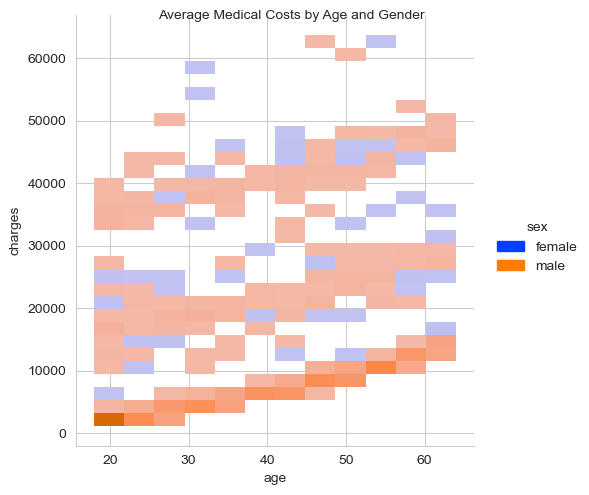

In [3]:
import pandas as pd
import seaborn as sns

project_data = pd.read_csv('../data/raw/Medical_Cost.csv')

sns.set_style('whitegrid')
plot_title = "Average Medical Costs by Age and Gender"

df = sns.displot(x='age', hue='sex', y='charges', data=project_data, palette='bright')
df.fig.suptitle(plot_title, fontsize=10)


The graph depicts the distribution of medical costs according to age and gender. The x-axis denotes age, the y-axis denotes medical costs, and the colour denotes gender.

We can infer from the graph that medical costs tend to rise as people age, notably for males and females between the ages of 40 and 60. Furthermore, we can see that males have higher medical costs than females across all age categories, however the disparity is less prominent in older age groups.


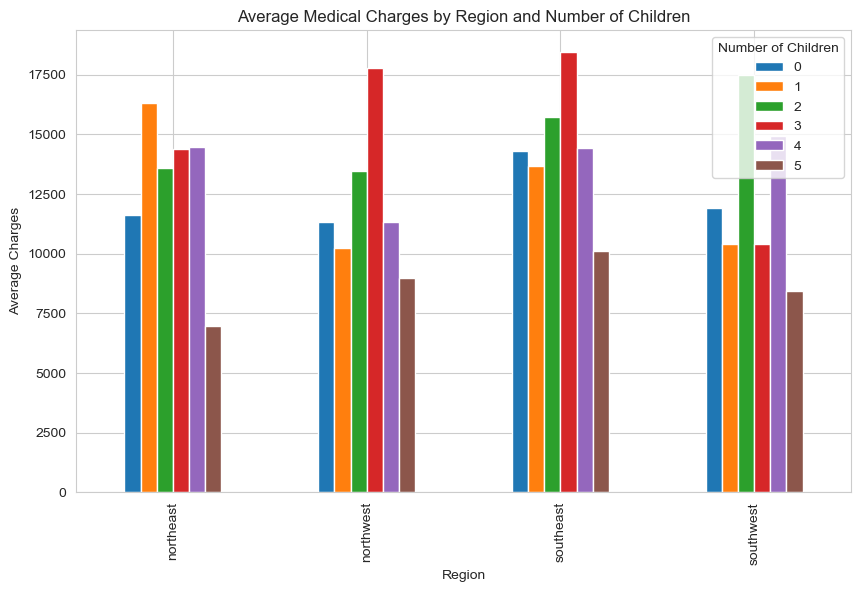

In [7]:


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/Medical_Cost.csv')

df['children_group'] = pd.cut(df['children'], bins=[-1, 0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2', '3', '4', '5', '6+'])


pivot_table = pd.pivot_table(df, index='region', columns='children_group', values='charges', aggfunc='mean')


fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar', ax=ax)


ax.set_title('Average Medical Charges by Region and Number of Children')
ax.set_xlabel('Region')
ax.set_ylabel('Average Charges')
ax.legend(title='Number of Children')
plt.show()




The graph supplied depicts the average charges by region and child count. The x-axis indicates the various regions, and the y-axis reflects the average healthcare charges. The legend depicts the various numbers of children (0, 1, 2, 3, 4, 5, 6+) and their corresponding colours.

From the graph we can tell that the number of children has a positive association with the average cost of healthcare. Individuals with more children had greater healthcare costs across all regions, albeit this reduces after 4-5 children. The Southeast area likewise has the highest average charges, followed by the Northeast, Southwest, and Northwest.

Text(0.5, 0.98, 'Average Medical Charges Based on Age and Number of Children')

<Figure size 1000x800 with 0 Axes>

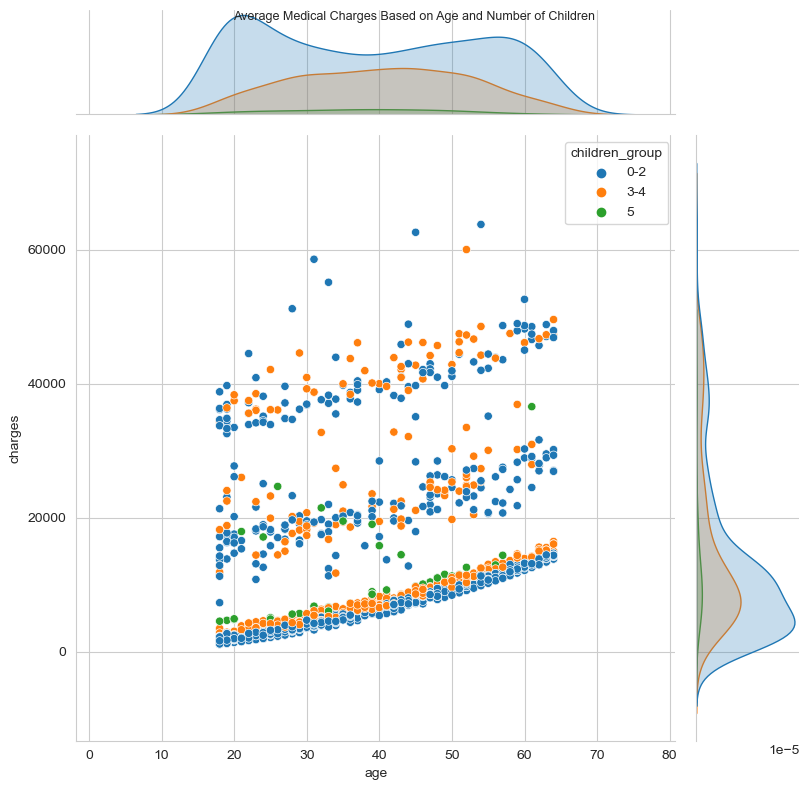

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

project_data = pd.read_csv('../data/raw/Medical_Cost.csv')

project_data['children_group'] = pd.cut(project_data['children'], bins=[-1, 1, 3, 5], labels=['0-2', '3-4', '5'])

sns.set_style('whitegrid')

plot_title = "Average Medical Charges Based on Age and Number of Children"

plt.figure(figsize=(10, 8))
joint_plot = sns.jointplot(y='charges', x='age', hue='children_group', data=project_data, height=8)
joint_plot.fig.suptitle(plot_title, fontsize=9)



The graph depicts the average medical expenses based on the age of the person and amount of children he/she may have. The x-axis depicts age, the y-axis represents medical costs, and the colour represents the number of children divided into three categories: 0-2, 3-4, and 5.

From the graph we can conclude that the number of children has a positive link with healthcare costs, especially for people aged 20 to 40. We may also see that as people age, the association between healthcare costs and the number of children weakens. Furthermore, we can see that healthcare costs tend to rise as people age, particularly for those with 3-4 children.

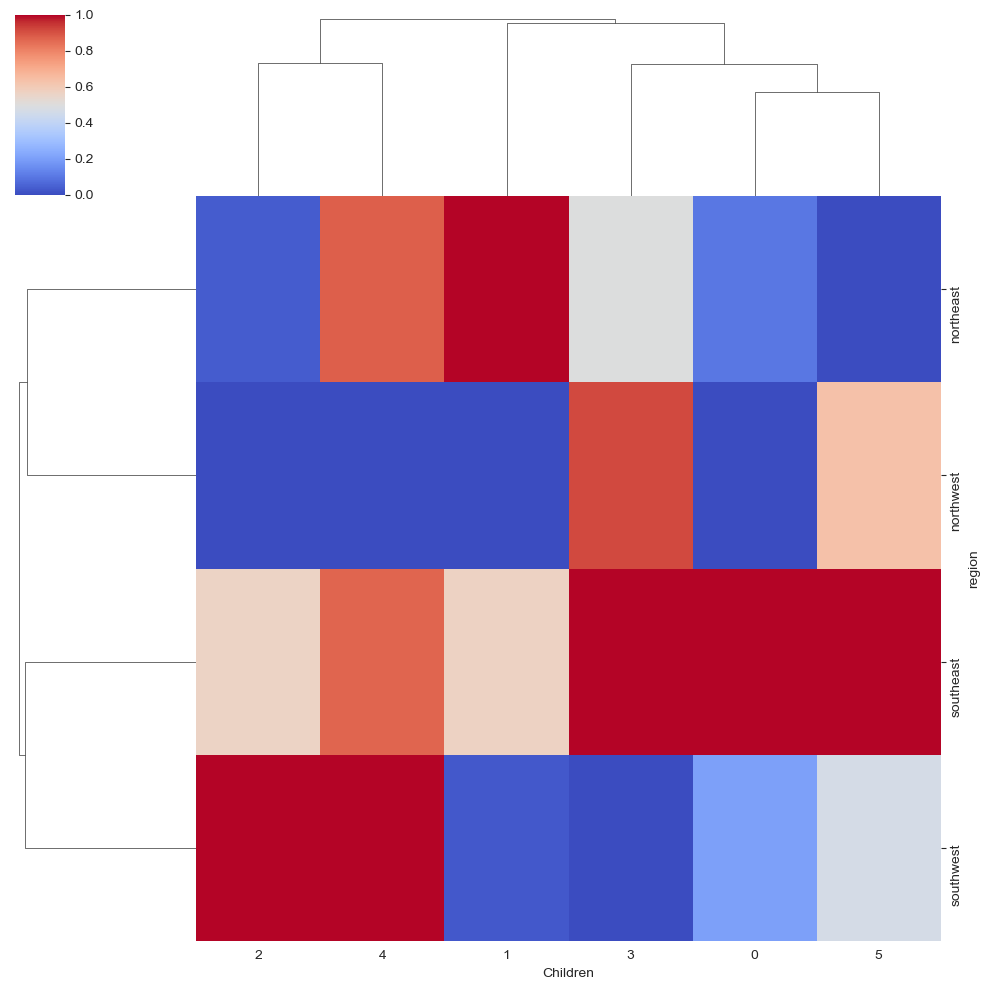

In [10]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('../data/raw/Medical_Cost.csv')

df['Children'] = pd.cut(df['children'], bins=[-1, 0, 1, 2, 3, 4, 5, 6], labels=['0', '1', '2', '3', '4', '5', '6+'])

pivot_table = pd.pivot_table(df, index='region', columns='Children', values='charges', aggfunc='mean')

sns.clustermap(pivot_table, cmap='coolwarm', standard_scale=1)


**Cleaning Data**

I have cleaned my dataframe here. There will be no dulpicates or Na values in the following columns. 

In [68]:
import pandas as pd

data = pd.read_csv('../data/raw/Medical_Cost.csv')

data_cleaned = data.loc[:, ['age', 'sex', 'children', 'bmi', 'smoker', 'region', 'charges']]

data_cleaned = data_cleaned.rename(columns={'age': 'Age', 'sex': 'Sex', 'children': 'Children', 'bmi': 'BMI', 'smoker': 'Smoker', 'region': 'Region', 'charges': 'Charges'})

missing_values = data_cleaned.isna().sum()
data_cleaned.to_csv('cleaned_data.csv', index=False)


print("Number of missing values:")
print(missing_values)




Number of missing values:
Age         0
Sex         0
Children    0
BMI         0
Smoker      0
Region      0
Charges     0
dtype: int64


**Processing Data**


In this code I am processing the data by first filtering the rows based on the standard deviation of the 'children' column, then creating a new column 'family_size' based on the number of children each person has, and finally categorizing the 'family_size' column based on the number of children and sex of the person. The resulting cleaned and processed data is stored in the 'data_cleaned' variable.

In [108]:
import pandas as pd



data_cleaned = data[(data['children'] - data['children'].mean()) / data['children'].std() < 3]

data_cleaned['family_size'] = 'no family'

data_cleaned.loc[(data_cleaned['children'] >= 1) & (data_cleaned['children'] <= 2), 'family_size'] = 'small'

data_cleaned.loc[(data_cleaned['children'] >= 3) & (data_cleaned['children'] <= 4), 'family_size'] = 'normal'

data_cleaned.loc[data_cleaned['children'] >= 5, 'family_size'] = 'large'

data_cleaned.loc[data_cleaned['sex'] == 'male', 'family_size'] 

data_cleaned.loc[data_cleaned['sex'] == 'female', 'family_size'] 

data_cleaned




,age,sex,bmi,children,smoker,region,charges,family_size
0,19,female,27.900,0,yes,southwest,16884.92400,no family
1,18,male,33.770,1,no,southeast,1725.55230,small
2,28,male,33.000,3,no,southeast,4449.46200,normal
3,33,male,22.705,0,no,northwest,21984.47061,no family
4,32,male,28.880,0,no,northwest,3866.85520,no family
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,normal
1334,18,female,31.920,0,no,northeast,2205.98080,no family
1335,18,female,36.850,0,no,southeast,1629.83350,no family
1336,21,female,25.800,0,no,southwest,2007.94500,no family


**Wrangling Data**

In this code, I am renaming the columns of the data frame 'data_cleaned' to match the desired format. Then, converting the 'sex' and 'smoker' columns to the categorical data type, which is useful for certain types of analysis. Finally, converting the 'family_size' column to numeric values by mapping its original string values to their corresponding integer values. This allows us to perform mathematical calculations on the 'family_size' column.

In [109]:

import pandas as pd
import numpy as np


data_cleaned.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'family_size']

data_cleaned['sex'] = pd.Categorical(data_cleaned['sex'])
data_cleaned['smoker'] = pd.Categorical(data_cleaned['smoker'])

data_cleaned['family_size'] = data_cleaned['family_size'].replace({'no family': 1, 'small': 2, 'normal': 3, 'large':4})

data_cleaned


,age,sex,bmi,children,smoker,region,charges,family_size
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,3
1334,18,female,31.920,0,no,northeast,2205.98080,1
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,1


**Method Chaining**

In method chain 1, missing values are removed from the dataframe and only rows where the age column is greater than or equal to 18 are kept.

In method chain 2, a new column children_category is created based on the number of children a person has, and the dataframe is grouped by sex and children_category. The mean of the charges column, the median of the age column, and the first value of the region column are computed for each group. The resulting dataframe is then renamed to have more descriptive column names and is reset to have a default index.

In method chain 3, the data is reshaped using the melt() function. The sex and children_category columns are kept as id_vars and all other columns are melted into a single column metric. The resulting dataframe has a row for each combination of sex, children_category, and metric.

Finally, the function returns the latest dataframe cleaned_data_melted.


In [ ]:

def clean_and_analyze(data):
    
   
    data_cleaned = (
        data.dropna()
            .query("age >= 18")
    )
    
   
    cleaned_data = (
        data_cleaned.assign(children_category=lambda x: pd.cut(x['children'], bins=[-1, 0, 2, 4, 100], labels=['No children', '1-2 children', '3-4 children', 'More than 4 children']))
            .groupby(['sex', 'children_category'])
            .agg({'charges': 'mean', 'age': 'median', 'region': 'first'})
            .rename(columns={'charges': 'mean_charges', 'age': 'median_age', 'region': 'most_common_region'})
            .reset_index()
    )
    
    
    cleaned_data_melted = (
        cleaned_data.melt(id_vars=['sex', 'children_category'], var_name='metric')
    )
     return cleaned_data_melted

In [126]:
d = pd.read_csv('../data/raw/Medical_Cost.csv')

clean_and_analyze(d)

mean_charges  median_age most_common_region
sex    children_category                                                
female No children           11905.714276        36.0          southwest
       1-2 children          12926.035044        41.0          southeast
       3-4 children          13874.613753        41.0          northwest
       More than 4 children   9854.006419        39.0          southwest
male   No children           12832.696736        37.0          northwest
       1-2 children          14501.892900        39.0          southeast
       3-4 children          16341.333841        40.0          southeast
       More than 4 children   7931.658310        33.0          northeast